# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
data=pd.read_csv('/content/survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
data.shape

(1259, 27)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [4]:
# Computing unique %of unique values per column on over all samples
diversity_map = []
for index, column in enumerate(data.columns):
    unique_values = pd.unique(data.iloc[:, index])
    diversity_map.append((column,(len(unique_values)/data.shape[0])*100))
diversity_map = sorted(diversity_map, key= lambda x: x[1], reverse=True)

print(diversity_map)


[('Timestamp', 98.96743447180302), ('comments', 12.787926926131851), ('Age', 4.209690230341541), ('Gender', 3.8919777601270846), ('Country', 3.8125496425734715), ('state', 3.653693407466243), ('no_employees', 0.47656870532168394), ('work_interfere', 0.3971405877680699), ('leave', 0.3971405877680699), ('self_employed', 0.23828435266084197), ('benefits', 0.23828435266084197), ('care_options', 0.23828435266084197), ('wellness_program', 0.23828435266084197), ('seek_help', 0.23828435266084197), ('anonymity', 0.23828435266084197), ('mental_health_consequence', 0.23828435266084197), ('phys_health_consequence', 0.23828435266084197), ('coworkers', 0.23828435266084197), ('supervisor', 0.23828435266084197), ('mental_health_interview', 0.23828435266084197), ('phys_health_interview', 0.23828435266084197), ('mental_vs_physical', 0.23828435266084197), ('family_history', 0.15885623510722796), ('treatment', 0.15885623510722796), ('remote_work', 0.15885623510722796), ('tech_company', 0.15885623510722796

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [6]:
# finding redundant columns
for index, column in enumerate(data.columns):
    unique_values = pd.unique(data.iloc[:, index])
    if len(unique_values) == 1:
        # columns with only one unique entry
        print("column: {} with redundant_value: {}".format(column, unique_values[0]))

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

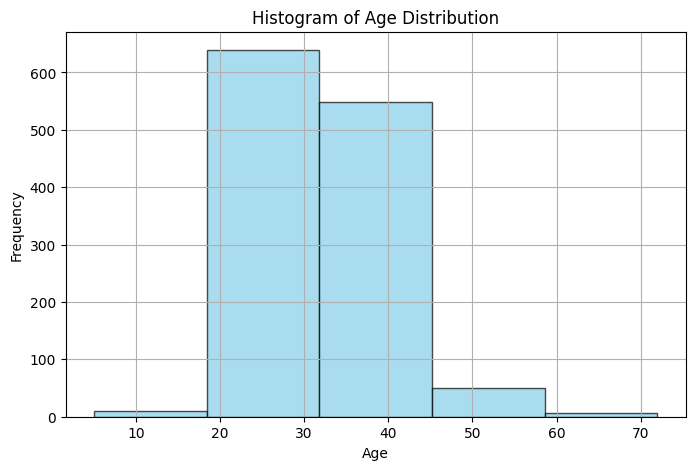

In [15]:
#Cretaing a Histogram for age distribution
import matplotlib.pyplot as plt
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data = data[(data['Age'] > 0) & (data['Age'] <= 100)]
plt.figure(figsize=(8, 5))
plt.hist(data["Age"], bins=5, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid()
plt.show()

The histogram of age distribution shows a clear bimodal pattern with two distinct peaks. The first peak occurs around the early 20s, with a large number of individuals falling within this age range,This suggests that the dataset has a significant concentration of younger individuals, followed by another notable group in their 30s. There are fewer individuals in older age ranges, as the frequencies drop sharply after 40, and very few people fall in the 50s or 60s, which could indicate an underrepresentation of older age.


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

<ipython-input-23-9e625527dd02>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Age', data=data, palette='Set2')


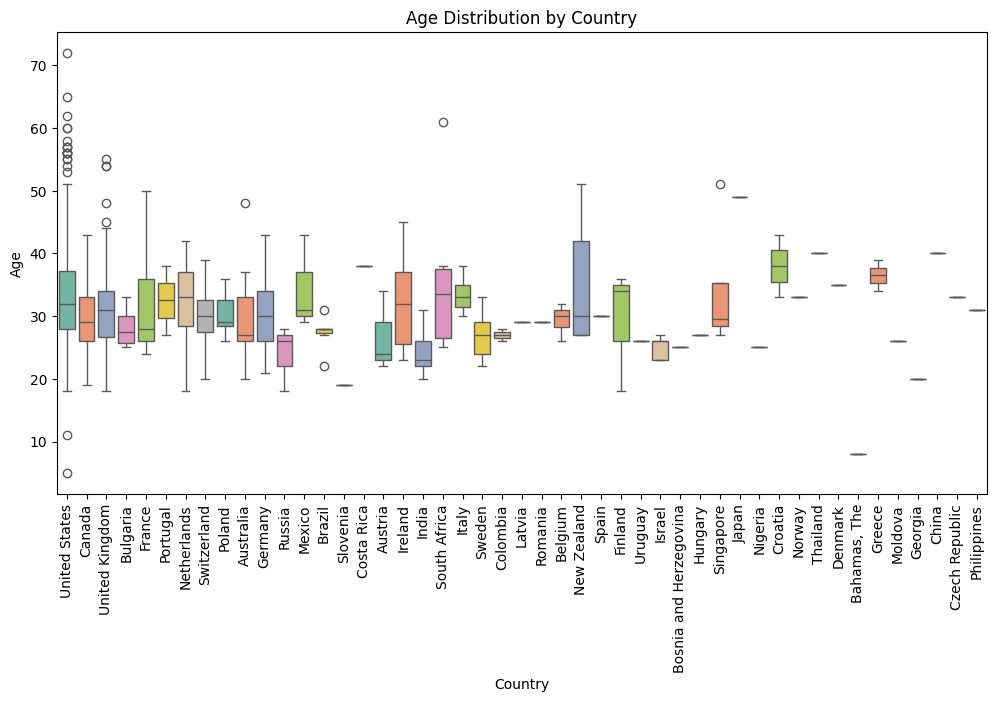

In [23]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Age', data=data, palette='Set2')
plt.title("Age Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Age")
plt.xticks(rotation=90)
plt.show()

The boxplot depicting "Age Distribution by Country" reveals significant variability in the age distributions across different countries. While most countries, such as the United States, Canada, and the United Kingdom, exhibit a wide range of ages with some extreme outliers, other countries like the Philippines, Nigeria, and the Czech Republic show more concentrated age distributions. These countries have smaller spreads of age, indicating a younger or more uniform population in the dataset.



---



## Submitting Your Work

Submit your work as usual.